In [11]:
import pandas as pd

In [12]:
train_path = '../Data/widsdatathon2024-university/train.csv'
test_path = '../Data/widsdatathon2024-university/test.csv'
output_path = '../Data/train_test_tt.csv'
train_df = pd.read_csv(train_path)
train_df['allocated_set'] = 'train'
test_df = pd.read_csv(test_path)
test_df['allocated_set'] = 'test'

df = pd.concat([train_df,test_df],
              axis=0).reset_index(drop=True)

In [13]:
map_cancer_desc = {
    'Malignant neoplasm of ovrlp sites of right female breast': {'side':'R', 'quadrant':'overlap'},
    'Malig neoplasm of upper-outer quadrant of left female breast': {'side':'L', 'quadrant':'UO'},
    'Malig neoplasm of upper-inner quadrant of left female breast': {'side':'L', 'quadrant':'UI'},
    'Malignant neoplasm of breast (female), unspecified': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplm of lower-inner quadrant of right female breast': {'side':'R', 'quadrant':'LI'},
    'Malignant neoplasm of upper-inner quadrant of female breast': {'side':'unspecified', 'quadrant':'UI'},
    'Malignant neoplasm of central portion of left female breast': {'side':'L', 'quadrant':'central'},
    'Malignant neoplasm of unspecified site of left female breast': {'side':'L', 'quadrant':'unspecified'},
    'Malig neoplm of upper-inner quadrant of right female breast': {'side':'R', 'quadrant':'UI'},
    'Malignant neoplasm of unsp site of unspecified female breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of unsp site of right female breast': {'side':'R', 'quadrant':'unspecified'},
    'Malig neoplm of upper-outer quadrant of right female breast': {'side':'R', 'quadrant':'UO'},
    'Malig neoplasm of lower-inner quadrant of left female breast': {'side':'L', 'quadrant':'LI'},
    'Malignant neoplasm of nipple and areola, left female breast': {'side':'L', 'quadrant':'nipple'},
    'Malignant neoplasm of lower-outer quadrant of female breast': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of other specified sites of female breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplm of lower-outer quadrant of right female breast': {'side':'R', 'quadrant':'LO'},
    'Malignant neoplasm of central portion of breast, female': {'side':'unspecified', 'quadrant':'central'},
    'Malignant neoplasm of lower-inner quadrant of female breast': {'side':'unspecified', 'quadrant':'LI'},
    'Malignant neoplasm of ovrlp sites of left female breast': {'side':'L', 'quadrant':'overlap'},
    'Malignant neoplasm of central portion of right female breast': {'side':'R', 'quadrant':'central'},
    'Malignant neoplasm of nipple and areola, right female breast': {'side':'R', 'quadrant':'nipple'},
    'Malignant neoplasm of axillary tail of left female breast': {'side':'L', 'quadrant':'axillary tail'},
    'Malignant neoplasm of upper-outer quadrant of female breast': {'side':'unspecified', 'quadrant':'UO'},
    'Malig neoplasm of upper-outer quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'UO'},
    'Malig neoplasm of lower-outer quadrant of left female breast': {'side':'L', 'quadrant':'LO'},
    'Malignant neoplasm of central portion of unsp female breast': {'side':'unspecified', 'quadrant':'central'},
    'Malig neoplasm of lower-outer quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of axillary tail of right female breast': {'side':'R', 'quadrant':'axillary tail'},
    'Malignant neoplasm of ovrlp sites of unsp female breast': {'side':'unspecified', 'quadrant':'overlap'},
    'Malignant neoplasm of upper-outer quadrant of breast, female': {'side':'unspecified', 'quadrant':'UO'},
    'Malignant neoplasm of overlapping sites of breast, female': {'side':'unspecified', 'quadrant':'overlap'},
    'Malignant neoplasm of central portion of female breast': {'side':'unspecified', 'quadrant':'central'},
    'Malignant neoplasm of axillary tail of breast, female': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of breast of unspecified site, female': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplasm of upper-inner quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'UI'},
    'Secondary malignant neoplasm of breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of lower-outer quadrant of breast, female': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of axillary tail of unsp female breast': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of nipple and areola, unsp female breast': {'side':'unspecified', 'quadrant':'nipple'},
    'Malig neoplasm of lower-inner quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'LI'},
    'Malignant neoplasm of axillary tail of female breast': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of unsp site of unspecified male breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplasm of lower-outer quadrant of right male breast': {'side':'R', 'quadrant':'LO'},
    'Malig neoplasm of upper-inner quadrant of left male breast': {'side':'L', 'quadrant':'UI'},
    'Malignant neoplasm of upper-inner quadrant of breast, female': {'side':'unspecified', 'quadrant':'UI'},
    'Malignant neoplasm of nipple and areola of female breast': {'side':'unspecified', 'quadrant':'nipple'},
    'Malignant neoplasm of nipple and areola, female': {'side':'unspecified', 'quadrant':'nipple'},
    'Malignant neoplasm of nipple and areola, right male breast': {'side':'R', 'quadrant':'nipple'},
    'Malignant neoplasm of central portion of right male breast': {'side':'R', 'quadrant':'central'},
    'Malignant neoplasm of lower-inner quadrant of breast, female': {'side':'unspecified', 'quadrant':'LI'},
    'Malig neoplasm of lower-outer quadrant of left male breast': {'side':'L', 'quadrant':'LO'},
    'Malig neoplasm of upper-outer quadrant of right male breast': {'side':'R', 'quadrant':'UO'},
    'Malig neoplasm of upper-inner quadrant of right male breast': {'side':'R', 'quadrant':'UI'},
    'Malignant neoplasm of other and unspecified sites of male breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of unspecified site of right male breast': {'side':'R', 'quadrant':'unspecified'},
    'Malig neoplasm of lower-inner quadrant of left male breast': {'side':'L', 'quadrant':'LI'},
    'Malig neoplasm of upper-outer quadrant of left male breast': {'side':'L', 'quadrant':'UO'},
    'Malignant neoplasm of breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of nipple and areola, left male breast': {'side':'L', 'quadrant':'nipple'},
    'Malignant neoplasm of axillary tail of right male breast': {'side':'R', 'quadrant':'axillary tail'},
}

(array([2.092e+03, 4.945e+03, 3.514e+03, 3.563e+03, 2.724e+03, 2.210e+03,
        1.343e+03, 8.470e+02, 6.410e+02, 4.420e+02, 3.620e+02, 3.210e+02,
        2.610e+02, 2.790e+02, 2.880e+02, 4.400e+02, 3.020e+02, 2.210e+02,
        2.350e+02, 1.810e+02, 1.860e+02, 1.440e+02, 1.170e+02, 1.060e+02,
        6.900e+01, 9.200e+01, 6.600e+01, 8.900e+01, 7.600e+01, 6.200e+01,
        7.100e+01, 6.200e+01, 5.200e+01, 4.800e+01, 5.000e+01, 4.900e+01,
        4.500e+01, 4.700e+01, 4.000e+01, 4.800e+01, 2.800e+01, 2.900e+01,
        4.000e+01, 3.600e+01, 3.200e+01, 3.500e+01, 3.500e+01, 3.000e+01,
        2.800e+01, 1.900e+01, 2.200e+01, 2.100e+01, 2.400e+01, 2.000e+01,
        1.300e+01, 2.200e+01, 1.900e+01, 1.800e+01, 2.100e+01, 2.000e+01,
        1.700e+01, 1.900e+01, 1.600e+01, 2.100e+01, 2.000e+01, 1.200e+01,
        1.400e+01, 9.000e+00, 1.000e+01, 6.000e+00, 7.000e+00, 8.000e+00,
        3.000e+00, 1.000e+01, 5.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 7.000e+00]),
 array

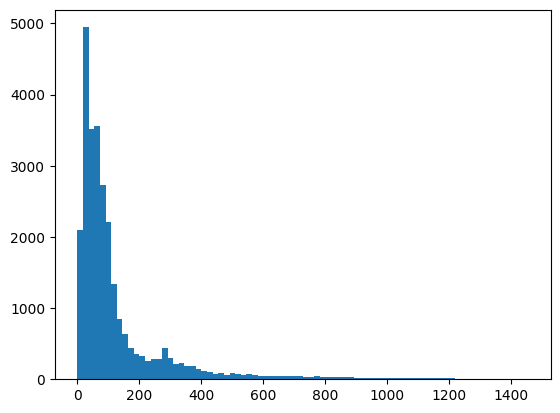

(array([2.092e+03, 4.945e+03, 3.514e+03, 3.563e+03, 2.724e+03, 2.210e+03,
        1.343e+03, 8.470e+02, 6.410e+02, 4.420e+02, 3.620e+02, 3.210e+02,
        2.610e+02, 2.790e+02, 2.880e+02, 4.400e+02, 3.020e+02, 2.210e+02,
        2.350e+02, 1.810e+02, 1.860e+02, 1.440e+02, 1.170e+02, 1.060e+02,
        6.900e+01, 9.200e+01, 6.600e+01, 8.900e+01, 7.600e+01, 6.200e+01,
        7.100e+01, 6.200e+01, 5.200e+01, 4.800e+01, 5.000e+01, 4.900e+01,
        4.500e+01, 4.700e+01, 4.000e+01, 4.800e+01, 2.800e+01, 2.900e+01,
        4.000e+01, 3.600e+01, 3.200e+01, 3.500e+01, 3.500e+01, 3.000e+01,
        2.800e+01, 1.900e+01, 2.200e+01, 2.100e+01, 2.400e+01, 2.000e+01,
        1.300e+01, 2.200e+01, 1.900e+01, 1.800e+01, 2.100e+01, 2.000e+01,
        1.700e+01, 1.900e+01, 1.600e+01, 2.100e+01, 2.000e+01, 1.200e+01,
        1.400e+01, 9.000e+00, 1.000e+01, 6.000e+00, 7.000e+00, 8.000e+00,
        3.000e+00, 1.000e+01, 5.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 7.000e+00]),
 array

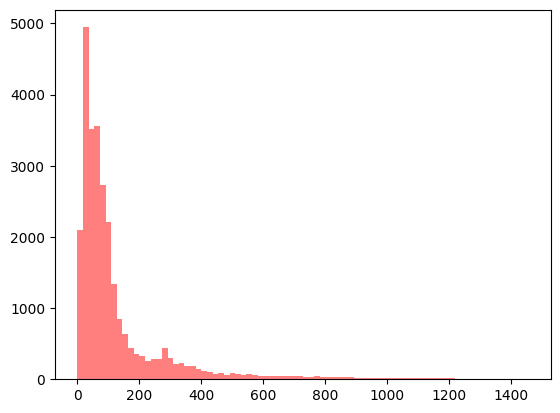

In [64]:
plt.hist(df[df['metastatic_first_novel_treatment_type'].isnull()]['treatment_pd'], bins=80, alpha=0.5, label='Without Novel Treatment', color='red')

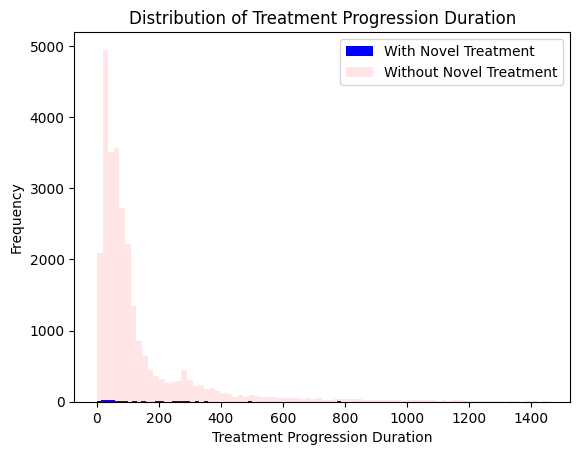

In [77]:
import matplotlib.pyplot as plt

# Example DataFrame and column names
# Assuming df is your DataFrame, and 'treatment_pd' is your numerical variable,
# 'metastatic_first_novel_treatment_type' is your categorical column with null values

# Histogram for data where 'metastatic_first_novel_treatment_type' is not null
plt.hist(df[~df['metastatic_first_novel_treatment_type'].isnull()]['treatment_pd'], bins=80, alpha=1, label='With Novel Treatment', color='blue')

# Histogram for data where 'metastatic_first_novel_treatment_type' is null
plt.hist(df[df['metastatic_first_novel_treatment_type'].isnull()]['treatment_pd'], bins=80, alpha=0.1, label='Without Novel Treatment', color='red')

# Adding labels and title
plt.xlabel('Treatment Progression Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Treatment Progression Duration')
plt.legend()  # This adds the legend to the plot

# Show the plot
plt.show()


In [52]:
df[~df['metastatic_first_novel_treatment_type'].isnull()]

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,breast_cancer_diagnosis_year,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd,allocated_set,side,quadrant
137,493218,White,MEDICAID,MI,481,41,30.24,C50112,Malignant neoplasm of central portion of left ...,2015,...,12.488571,12.122857,1.690000,26.273913,4.365714,6.500000,786.0,train,L,central
172,308526,NaN,COMMERCIAL,NY,119,36,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,2016,...,10.373810,8.065854,1.860976,30.474359,5.128571,6.576190,398.0,train,L,UO
265,765589,NaN,COMMERCIAL,NY,118,58,25.75,C50912,Malignant neoplasm of unspecified site of left...,2016,...,9.266667,3.433333,4.000000,34.700000,2.933333,2.800000,587.0,train,L,unspecified
451,162136,White,MEDICAID,FL,335,58,27.00,C50911,Malignant neoplasm of unsp site of right femal...,2017,...,13.961905,13.357143,2.965854,31.045238,12.454762,10.380952,26.0,train,R,unspecified
1213,600637,NaN,COMMERCIAL,CA,956,35,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",2015,...,13.501163,11.340698,2.968605,31.605479,4.717442,8.011628,1147.0,train,unspecified,unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38846,865550,White,MEDICARE ADVANTAGE,AR,729,66,NaN,C50911,Malignant neoplasm of unsp site of right femal...,2017,...,22.558824,17.805882,0.852941,27.606452,9.067647,9.923529,NaN,test,R,unspecified
39092,662383,NaN,COMMERCIAL,NJ,70,70,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",2015,...,8.811392,7.268354,7.503797,33.265823,7.441772,3.270886,NaN,test,unspecified,unspecified
39384,963680,Hispanic,MEDICARE ADVANTAGE,AZ,852,39,NaN,1744,Malignant neoplasm of upper-outer quadrant of ...,2015,...,10.636364,9.520455,1.863636,24.395455,8.584091,7.495455,NaN,test,unspecified,UO
39386,618389,NaN,COMMERCIAL,IL,606,45,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",2015,...,10.389286,16.678571,6.917857,33.423214,8.405357,3.171429,NaN,test,unspecified,unspecified


In [14]:
df['side'] = df['breast_cancer_diagnosis_desc'].apply(lambda x: map_cancer_desc[x]['side'])
df['quadrant'] = df['breast_cancer_diagnosis_desc'].apply(lambda x: map_cancer_desc[x]['quadrant'])

In [15]:
df = df.drop(columns=['patient_gender', "metastatic_first_treatment_type", "metastatic_first_novel_treatment" ])

In [16]:
df

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,breast_cancer_diagnosis_year,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd,allocated_set,side,quadrant
0,994155,Asian,COMMERCIAL,CA,917,46,27.00,C50811,Malignant neoplasm of ovrlp sites of right fem...,2018,...,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,35.0,train,R,overlap
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,2018,...,18.317021,13.546809,0.146809,31.890909,7.631915,9.631915,33.0,train,L,UO
2,387343,NaN,COMMERCIAL,TX,773,53,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,2018,...,14.083019,11.943396,2.549057,32.556250,16.396226,10.392453,24.0,train,L,UI
3,921275,Hispanic,MEDICAID,CA,928,50,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",2015,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,455.0,train,unspecified,unspecified
4,803454,NaN,COMMERCIAL,NY,112,39,18.00,1749,"Malignant neoplasm of breast (female), unspeci...",2015,...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,162.0,train,unspecified,unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,430644,White,MEDICARE ADVANTAGE,OH,443,70,33.00,C50911,Malignant neoplasm of unsp site of right femal...,2016,...,14.855556,24.911765,2.452941,21.405556,7.161111,6.250000,NaN,test,R,unspecified
39515,695045,NaN,COMMERCIAL,MD,212,55,35.87,C50412,Malig neoplasm of upper-outer quadrant of left...,2018,...,13.402500,18.391892,2.019444,28.346154,5.302500,5.405000,NaN,test,L,UO
39516,417489,Black,MEDICAID,SC,296,44,NaN,C50911,Malignant neoplasm of unsp site of right femal...,2018,...,15.223077,15.615625,1.026563,25.865079,10.304615,7.944615,NaN,test,R,unspecified
39517,623596,Hispanic,COMMERCIAL,CA,947,70,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,2018,...,8.810000,16.220000,3.290000,30.140000,3.020000,2.750000,NaN,test,L,UO


In [33]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dependent_var = 'treatment_pd'
# Numerical Independent Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Categorical Independent Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [23]:
assert len(numerical_cols) + len(categorical_cols) == df.shape[1]

In [30]:
numerical_cols

Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some

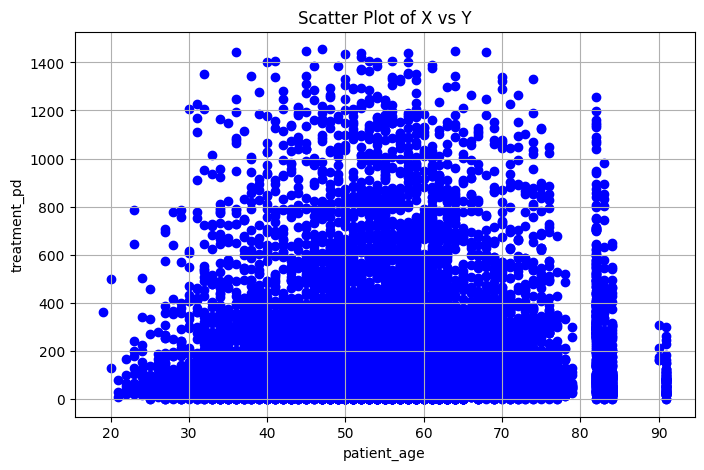

In [32]:
plt.figure(figsize=(8, 5))
plt.scatter(df[numerical_cols[2]], df[dependent_var], color='blue', marker='o')  # Adjust color and marker as needed
plt.title('Scatter Plot of X vs Y')
plt.xlabel(numerical_cols[2])
plt.ylabel( dependent_var)
plt.grid(True)  # Optional, adds a grid for easier visualization
plt.show()

In [38]:
numerical_cols

Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some

In [44]:
correlation_matrix['treatment_pd']

patient_id                     -0.000039
patient_zip3                   -0.007786
patient_age                     0.066225
bmi                            -0.017576
breast_cancer_diagnosis_year   -0.397843
                                  ...   
limited_english                 0.025402
commute_time                    0.026449
health_uninsured               -0.015612
veteran                        -0.021475
treatment_pd                    1.000000
Name: treatment_pd, Length: 70, dtype: float64

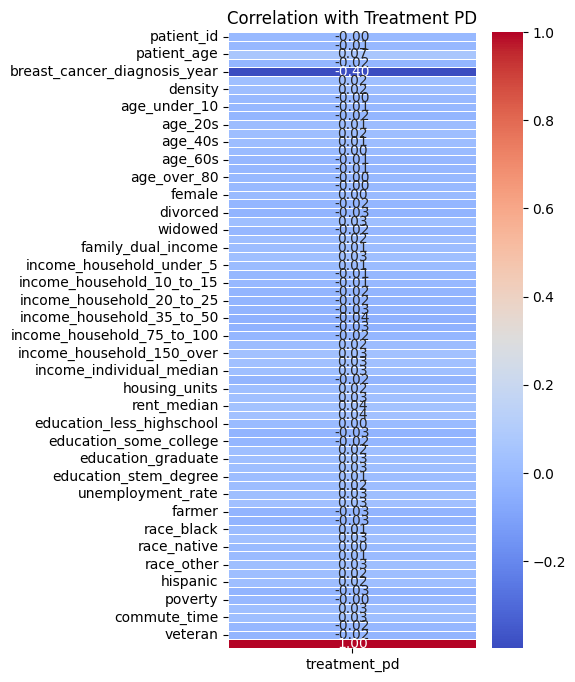

In [46]:
correlation_matrix = df[numerical_cols].corr()
target_correlation = correlation_matrix[['treatment_pd']]
# Plot a heatmap for the correlations of 'target' with all other variables
plt.figure(figsize=(4, 8))  # Adjust the size to fit your number of variables
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation with Treatment PD')
plt.show()


In [2]:
import pandas as pd
full_data_path = "../Data/train_test_added_climate_data_imputed.csv"
full_data = pd.read_csv(full_data_path)
# full_data.drop(columns=["patient_gender"], inplace=True)
full_data

,patient_race,payer_type,patient_state,patient_age,patient_gender,patient_bmi,patient_region,patient_division,patient_tumor_side,patient_tumor_quadrant,...,population_poverty_perc,population_limited_english_perc,population_commute_time,population_health_uninsured_perc,population_veteran_perc,climate_ozone,climate_pm25,climate_n02,treatment_pd,allocated_set
0,Asian,COMMERCIAL,CA,46,False,27.00,West,Pacific,R,overlap,...,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231,35.0,train
1,White,MEDICARE ADVANTAGE,OH,63,False,27.82,Midwest,East North Central,L,UO,...,13.546809,0.146809,31.890909,7.631915,9.631915,40.544389,8.399666,12.485563,33.0,train
2,Hispanic,COMMERCIAL,TX,53,False,27.12,South,West South Central,L,UI,...,11.943396,2.549057,32.556250,16.396226,10.392453,38.696786,9.361774,11.522807,24.0,train
3,Hispanic,MEDICAID,CA,50,False,26.42,West,Pacific,unspecified,unspecified,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,455.0,train
4,Other,COMMERCIAL,NY,39,False,18.00,Northeast,Middle Atlantic,unspecified,unspecified,...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,162.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,White,MEDICARE ADVANTAGE,OH,70,False,33.00,Midwest,East North Central,R,unspecified,...,24.911765,2.452941,21.405556,7.161111,6.250000,38.128975,8.811391,16.755649,NaN,test
39515,Black,COMMERCIAL,MD,55,False,35.87,South,South Atlantic,L,UO,...,18.391892,2.019444,28.346154,5.302500,5.405000,40.668109,8.019797,25.540078,NaN,test
39516,Black,MEDICAID,SC,44,False,32.98,South,South Atlantic,R,unspecified,...,15.615625,1.026563,25.865079,10.304615,7.944615,42.050404,7.893646,11.280694,NaN,test
39517,Hispanic,COMMERCIAL,CA,70,False,25.10,West,Pacific,L,UO,...,16.220000,3.290000,30.140000,3.020000,2.750000,30.939316,6.243063,18.201716,NaN,test


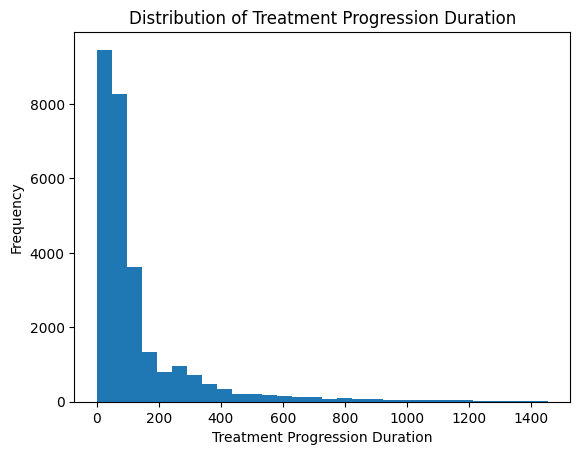

In [3]:
import matplotlib.pyplot as plt

plt.hist(full_data['treatment_pd'], bins=30)
plt.xlabel('Treatment Progression Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Treatment Progression Duration')
plt.show()